# Day2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1943 MCP 뉴런

In [ ]:
# 입력
x = np.linspace(0.1, 1.1, 5)
random = np.random.default_rng(1)
# 가중치
w = random.normal(0, 1, size=x.shape)
# 취합
z = np.dot(x, w)
print(f"z: {z:.2f}")
# 활성화 함수
b = 0.3
y = 1 if z > b else 0
# 결과
print(f"y: {y}")

pd.DataFrame({"x": x, "w": w, "x*w": x*w}).round(2).T

z: 0.41
y: 1


,0,1,2,3,4
x,0.10,0.35,0.60,0.85,1.10
w,0.35,0.82,0.33,-1.30,0.91
x*w,0.03,0.29,0.20,-1.11,1.00


In [14]:
def MCP_neuron(x, w, b):
    z = np.dot(x, w)
    y = 1 if z > b else 0
    return y

y = MCP_neuron(x, w, b)
print(f'x={x.round(2)} => f(x;w,b) = {y}')

x=[0.1  0.35 0.6  0.85 1.1 ] => f(x;w,b) = 1


## 논리회로

In [29]:
def logi(w, b):
    for xi in np.array([(0,0), (0,1), (1,0), (1,1)]):
        yi = MCP_neuron(xi, w, b)
        print(f'x={xi} => {yi}')

w_and = np.array([0.5, 0.5])
b_and = 0.7
print("AND 게이트")
logi(w_and, b_and)

AND 게이트
x=[0 0] => 0
x=[0 1] => 0
x=[1 0] => 0
x=[1 1] => 1


$$
\begin{aligned}
z &= w^{\top} x + b = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\\
y &= 
\begin{cases}
+1 \quad z > 0 \\
-1 \quad z \leq 0
\end{cases}
\end{aligned}
$$

입력 벡터 $\mathbf{x} = \left(x_1, x_2\right)$ 경우,

$$
z = w_1 x_1 + w_2 x_2 + b
$$

결정경계 $z = 0$ 

$$
\begin{aligned}
0 &= w_1 x_1 + w_2 x_2 + b
\\
x_2 &= \frac{w_1}{-w_2} x_1 + \frac{b}{-w_2}
\end{aligned}
$$

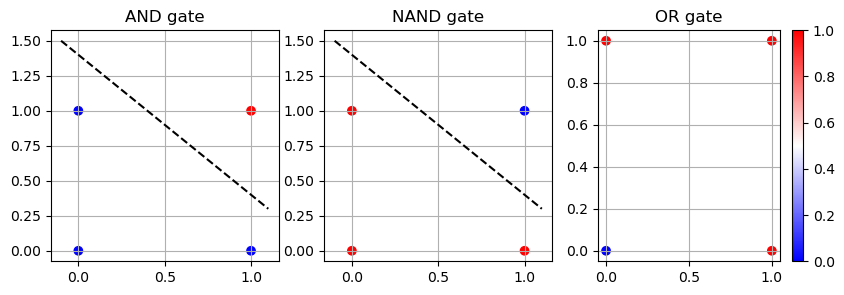

In [42]:
Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
plt.figure(figsize=(10, 3)) # 그림틀 크기 지정: 가로, 세로
plt.subplot(1, 3, 1) # 1행 3열 중 첫 번째 그림

y_and = np.array([0, 0, 0, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_and, cmap='bwr')

# 결정경계

z0 = lambda x, w, b: (w[0]*x + b) / -w[1]
x = np.linspace(-0.1, 1.1, 10)
plt.plot(x, z0(x, w_and, -b_and), 'k--')
plt.title('AND gate')
plt.grid()

plt.subplot(1, 3, 2) # 1행 3열 중 두 번째 그림
w_nand = np.array([-0.5, -0.5])
b_nand = 0.7
z_nand = lambda x, w, b: (w_nand[0]*x + b_nand) / -w_nand[1]
plt.plot(x, z_nand(x, w_nand, -b_nand), 'k--')
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_nand, cmap='bwr')
plt.title('NAND gate')
plt.grid()

plt.subplot(1, 3, 3) # 1행 3열 중 세 번째 그림
y_or = np.array([0, 1, 1, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_or, cmap='bwr')
plt.title('OR gate')
plt.grid()

plt.colorbar()
plt.show()

## 1958 퍼셉트론

In [45]:
samples = np.arange(10)

pd.DataFrame({
    "samples": samples,
    "x<5": samples < 5,
    'np.where': np.where(samples < 5, 1, -1)
}).T

,0,1,2,3,4,5,6,7,8,9
samples,0,1,2,3,4,5,6,7,8,9
x<5,True,True,True,True,True,False,False,False,False,False
np.where,1,1,1,1,1,-1,-1,-1,-1,-1


In [47]:
samples = np.random.default_rng(1).normal(0, 1, size=(3, 4))
print(samples.round(2))
print(np.where(samples > 0, 1, -1))

[[ 0.35  0.82  0.33 -1.3 ]
 [ 0.91  0.45 -0.54  0.58]
 [ 0.36  0.29  0.03  0.55]]
[[ 1  1  1 -1]
 [ 1  1 -1  1]
 [ 1  1  1  1]]


In [ ]:
class Perceptron:
    def __init__(self, w=None, b=None):
        self.w = w
        self.b = b
    
    def __call__(self, x):
        z = np.dot(x, self.w) + self.b
        y = np.where(z > 0, 1, -1) 
        return y

    def fit(self, data, target, 학습횟수, 학습률 = 1.0):
        """학습 알고리즘"""
        표본수, 특성수 = data.shape
        self.w = np.zeros(특성수, dtype=np.float32)
        self.b = 0.0

        매개변수변화 = []

        #각 표본의 오차 계산
        for epoch in range(학습횟수):
            매개변수변화.append(np.append(self.b, self.w.copy()))
            for xi, yi in zip(data, target):
                예측값 = self(xi)
                # self : 퍼셉트론 객체 , 같은 방식으로 하는 법 : self.__call__(xi)임. 
                #self.__init__()은 생성자 메서드라 호출 불가, __fnc__()가 fun()와의 차이점 : 객체가 함수처럼 호출될 수 있게 함.
                오차 = yi - 예측값
                갱신 = 오차 * 학습률
                self.w += 갱신 * xi
                self.b += 갱신
        return 매개변수변화


Xs = np.array([[0,0], [0,1], [1,0], [1,1]])
AND = Perceptron(w=np.array([0.5, 0.5]), b=-0.7)
y_and = np.array([-1, -1, -1, 1])
assert np.all(AND(Xs) == y_and)

NAND = Perceptron(w=np.array([-0.5, -0.5]), b=0.7)
y_nand = np.array([1, 1, 1, -1])
assert np.all(NAND(Xs) == y_nand)

OR = Perceptron(w=np.array([0.5, 0.5]), b=-0.2)
y_or = np.array([-1, 1, 1, 1])
assert np.all(OR(Xs) == y_or)